In [52]:
#imports
import pandas as pd
import numpy as np
import math as mat
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [53]:
df = pd.read_csv('/content/raw_house_data.csv')
df.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


MLS: code of the house
HOA: homeowners association

In [54]:
df.isnull().sum()

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64

So, for this case we have 35 nan, where the 0 has a meaning and there still None that weren't count.

In [55]:
df.size

80000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff84f77bc50>,
      dtype=object)

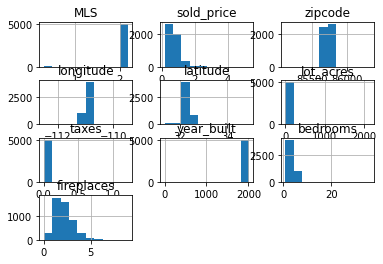

In [9]:
df.hist()

In [6]:
df.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

It is proceed to change the type of the columns to int or float in order to work with them


In [6]:
data = df

In [56]:

data['garage'].replace('None', np.nan, inplace=True)
data['bathrooms'].replace('None', np.nan, inplace=True)
data['sqrt_ft'].replace('None', np.nan, inplace=True)
data['HOA'].replace('None', np.nan, inplace=True)
data['floor_covering'].replace('None', np.nan, inplace=True)
data['sold_price'].replace('None', np.nan, inplace=True)
data.head(10)

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4,6842,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8,12025,4,"Dishwasher, Garbage Disposal, Oven",6.0,"Carpet, Natural Stone, Wood, Other",0
7,21211741,2500000.0,85750,-110.861002,32.331603,1.07,21646.00,2011,6,8,8921,4,"Compactor, Dishwasher, Freezer, Garbage Dispos...",5.0,"Carpet, Natural Stone, Wood",220
8,21324646,3700000.0,85718,-110.912156,32.343601,6.73,25094.39,2002,5,7,5238,3,"Compactor, Dishwasher, Freezer, Garbage Dispos...",1.0,"Carpet, Natural Stone, Wood, Other",421
9,21812010,3250000.0,85750,-110.837950,32.327575,3.53,18936.11,2007,5,6,6480,3,"Dishwasher, Double Sink, Electric Range, Freez...",2.0,"Carpet, Concrete",141.67


In [57]:
data.isna().sum()


MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features      0
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

Now, we know that the total of nans from the data are less than 30% of the total size, we could use linear regression for predict the missing data from HOA variable. The rest could be delete with dropna.



In [16]:
data['bathrooms'].nunique()

19

In [58]:
data['lot_acres'].isnull().sum()

10

In [59]:
table = data['kitchen_features'].nunique()
table

1872

In [38]:
for kitchen_features in data:
  print(df['kitchen_features'].unique())

['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Garbage Disposal, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall'
 'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless']
['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage Disposal'
 'Dishwasher, Garbage Disposal, Refrigerator' ...
 'Dishwasher, Electric Range, Island, Refrigerator, Reverse Osmosis, Appliance Color: Stainless'
 'Dishwasher, Double Sink, Garbage Disposal, Gas Range, Pantry: Cabinet, Appliance Color: Stainless, Countertops: Granite slab, Microwave: Stainless over oven, Oven: wall'
 'Compactor, Dishwasher, Double Sink, Island, Appliance Color: Stainless']
['Dishwasher, Freezer, Refrigerator, Oven' 'Dishwasher, Garbage 

In [66]:
checkdata = data
checkdata["sqrt_ft"] = checkdata.sqrt_ft.astype(float)

We tried to change the types from the columns with a dictionary, but, we found some info like this '20,000' causing conflit to use that method, however, pandas.Series.astype give us result



In [67]:
checkdata.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft             float64
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [68]:
checkdata["bathrooms"] = checkdata.bathrooms.astype(float)
checkdata["garage"] = checkdata.garage.astype(float)

checkdata.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

In [69]:
checkdata['HOA'] = checkdata['HOA'].replace(',','', regex=True)
checkdata["HOA"] = checkdata.HOA.astype(float)
checkdata.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude           float64
latitude            float64
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms           float64
sqrt_ft             float64
garage              float64
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                 float64
dtype: object

In [70]:
checkdata.isna().sum()

MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features      0
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64

The HOA variable had int, float and objets in the same colunm, so, in order to deal with it, the ',' were replace by '' and now it could be apply the type as float.

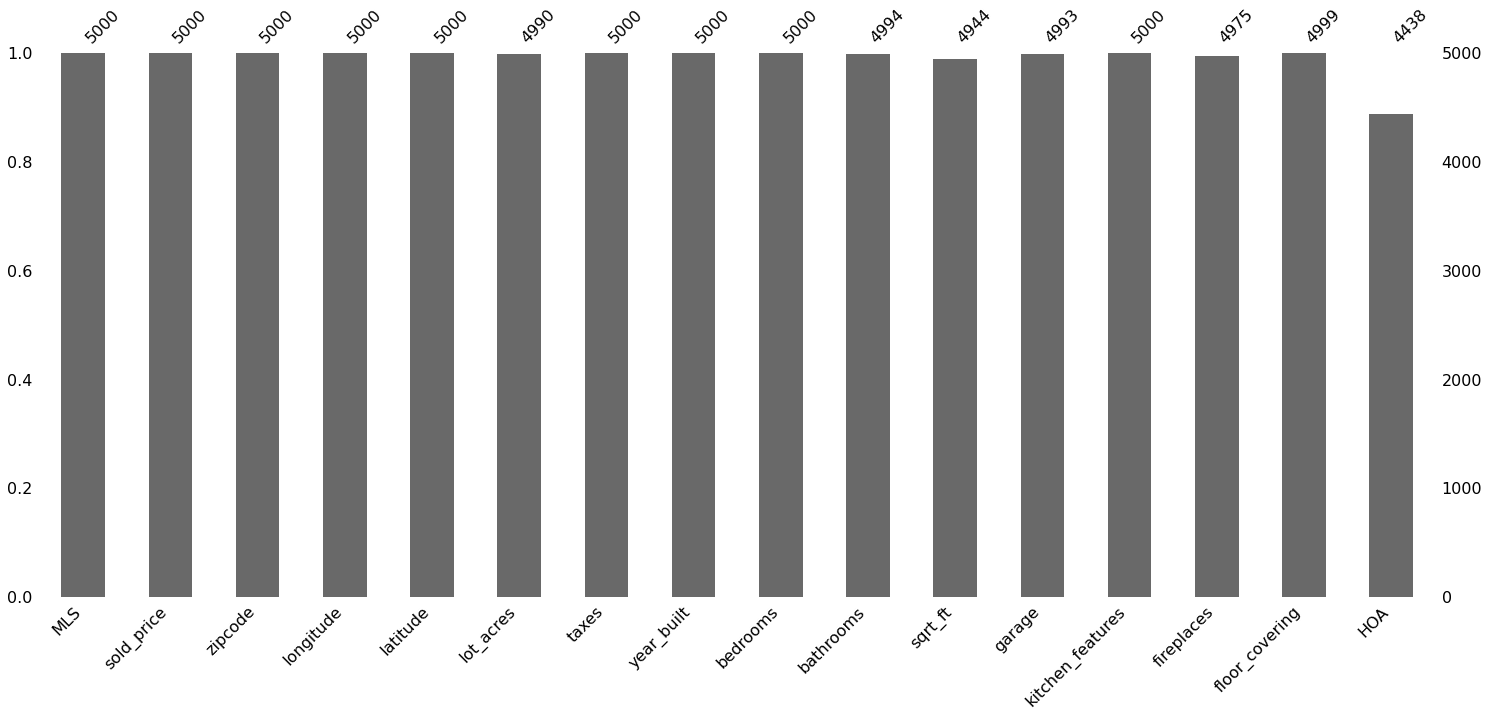

In [71]:
msno.bar(checkdata)

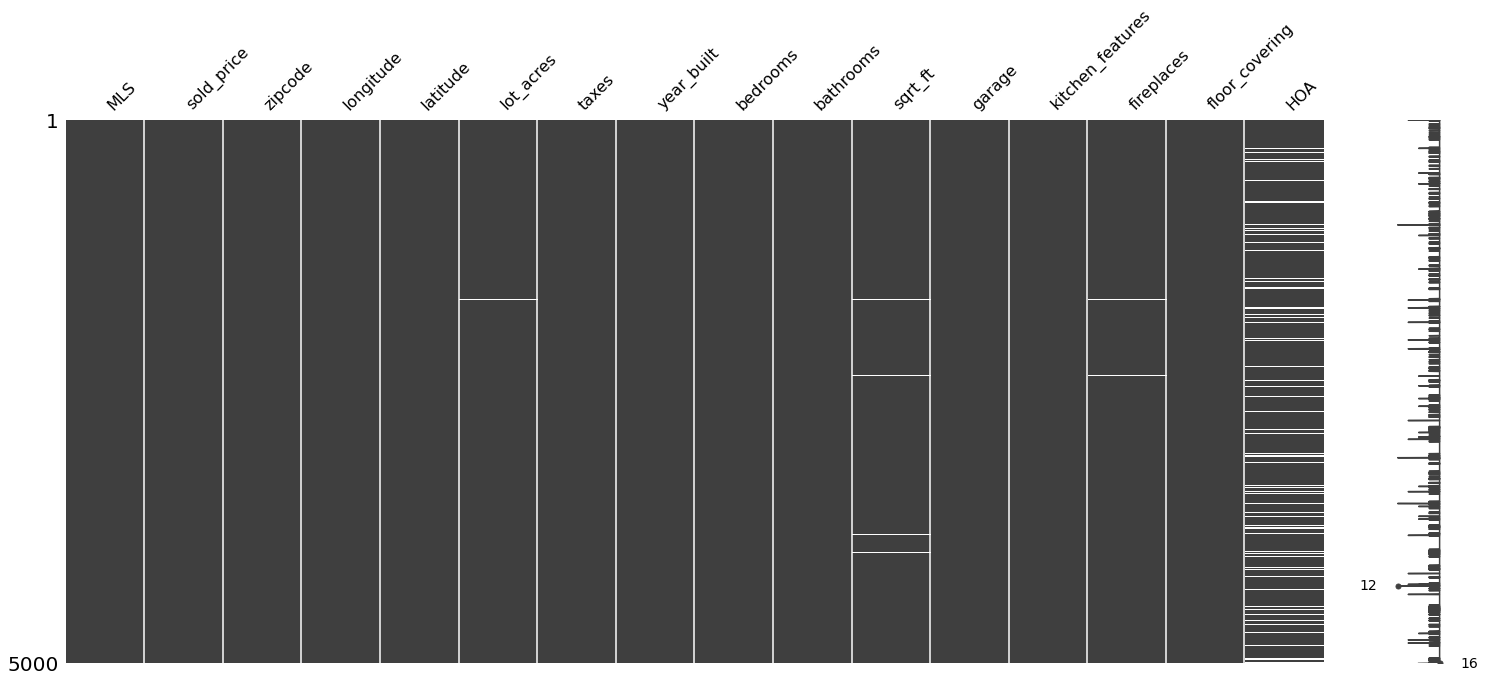

In [72]:
msno.matrix(checkdata)

Image 1 and 2. Shows the cuantitive and places where is the missing data.

# Predictions with linear regession


In [81]:
rdata = checkdata[checkdata["HOA"].isnull()]
dfl = checkdata.drop(labels=['MLS','zipcode','longitude','latitude','kitchen_features', 'floor_covering'], axis=1)
dfl.dropna(inplace=True)
dfl.head()

,sold_price,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
0,5300000.0,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0
1,4200000.0,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0
4,3411450.0,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0
5,3250000.0,1.67,27802.84,1999,3,4.0,6842.0,3.0,5.0,422.0
6,2400000.0,2.10,19038.42,2001,9,8.0,12025.0,4.0,6.0,0.0


In [82]:
xtrain = dfl.drop("HOA",axis=1)
ytrain = dfl["HOA"]

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lr = LinearRegression()

In [84]:
lr.fit(xtrain,ytrain)
xtest = dfl.drop("HOA",axis=1).fillna(0)
ypred = lr.predict(xtest)

Replace the missing data

In [85]:
dfl.loc[dfl.HOA.isnull(),'HOA'] = ypred

In [86]:
dfl.isnull().sum()

sold_price    0
lot_acres     0
taxes         0
year_built    0
bedrooms      0
bathrooms     0
sqrt_ft       0
garage        0
fireplaces    0
HOA           0
dtype: int64